In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [9]:
# --- Cell 2: Initialize grid ---
x = np.linspace(-5, 5, 40)
y = np.linspace(-5, 5, 40)
X, Y = np.meshgrid(x, y)
dx = dy = x[1] - x[0]

In [10]:
# --- Cell 3: Time-evolving wind field function ---
def wind_field(t):
    omega = 0.5  # angular frequency
    u = -Y * np.cos(omega * t)  # u-component of wind
    v = X * np.sin(omega * t)   # v-component of wind
    return u, v

In [11]:
# --- Cell 4: Vorticity and Divergence function ---
def compute_fields(u, v):
    dvdx = np.gradient(v, dx, axis=1)
    dudy = np.gradient(u, dy, axis=0)
    dudx = np.gradient(u, dx, axis=1)
    dvdy = np.gradient(v, dx, axis=0)

    divergence = dudx + dvdy
    vorticity = dvdx - dudy
    return divergence, vorticity

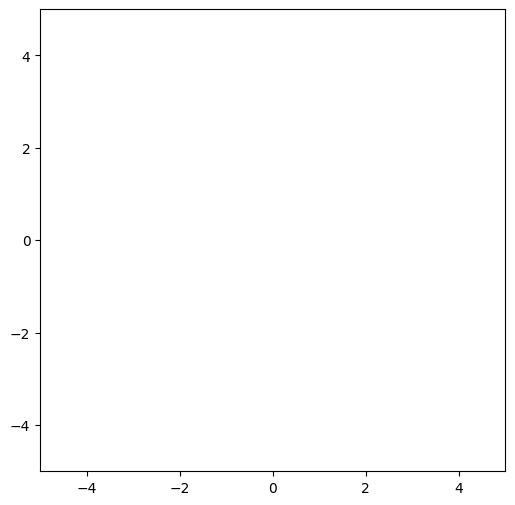

In [15]:
# --- Cell 5: Animation Setup ---
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
cbar = None

In [22]:
# --- Cell 6: Animation Update Function ---
def update(frame):
    ax.clear()
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    u, v = wind_field(frame)
    _, vort = compute_fields(u, v)

    contour = ax.contourf(X, Y, vort, cmap='RdBu', levels=20)
    ax.streamplot(X, Y, u, v, color='k')
    ax.set_title(f"Vorticity at time {frame:.1f}")

In [23]:
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 50), interval=200)
animation = ani
plt.show()